Import Statements

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


Load and Inspect Data

In [5]:
# Step 1: Load and Inspect Data
file_path = r"C:\Users\sbrah\OneDrive\Desktop\Data Projects\GCSE_Students_Project\gcse-english-and-maths-national-data-2019-20.csv"
data = pd.read_csv(file_path)


Data Cleaning

In [6]:
# Step 2: Data Cleaning
# Convert 'Value', 'Numerator', and 'Denominator' to numeric, coercing errors to NaN
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')
data['Numerator'] = pd.to_numeric(data['Numerator'], errors='coerce')
data['Denominator'] = pd.to_numeric(data['Denominator'], errors='coerce')

# Remove rows with NaN values in 'Value', 'Numerator', and 'Denominator' columns
data_clean = data.dropna(subset=['Value', 'Numerator', 'Denominator'])

# Reset the index
data_clean.reset_index(drop=True, inplace=True)


Exploratory Data Analysis (EDA)

             Value    Denominator      Numerator
count  1293.000000    1293.000000    1293.000000
mean     44.333488   32978.553751   16693.174787
std      23.492827   82006.433159   43675.051079
min       0.000000       2.000000       0.000000
25%      26.300000     497.000000     137.000000
50%      46.700000    3119.000000    1057.000000
75%      57.800000   16340.000000    7158.000000
max     100.000000  561994.000000  280417.000000


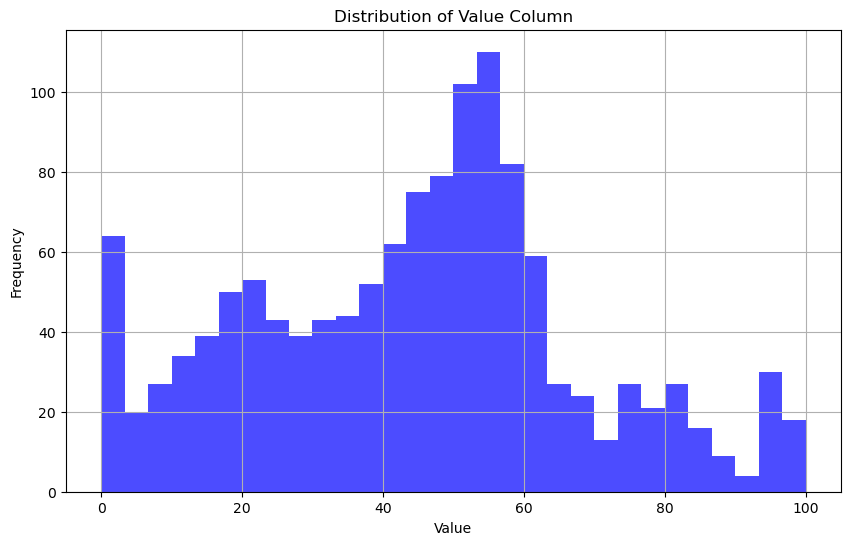

In [8]:
# Step 3: Exploratory Data Analysis (EDA)
# Summary Statistics
print(data_clean.describe())

# Distribution of 'Value' column
plt.figure(figsize=(10,6))
plt.hist(data_clean['Value'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Value Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Categorical Analysis and Visualization

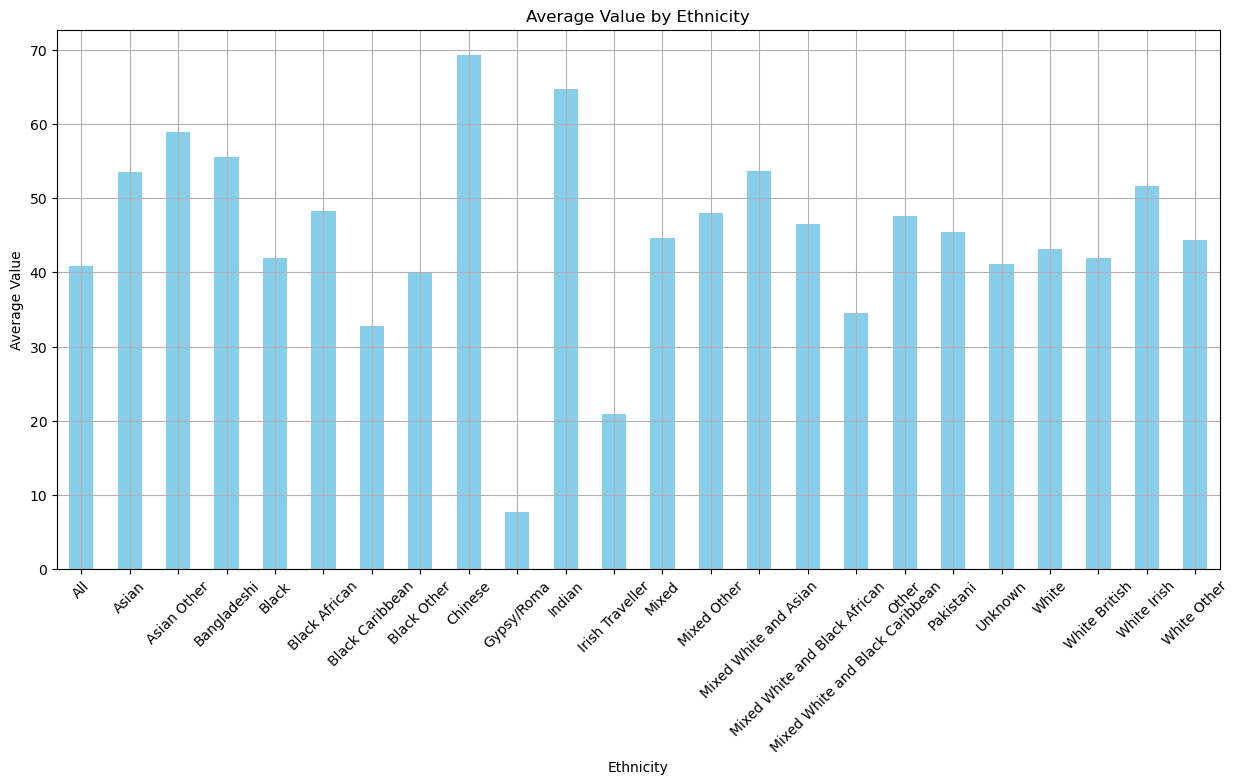

In [9]:
# Categorical Analysis: 'Value' by 'Ethnicity'
value_by_ethnicity = data_clean.groupby('Ethnicity')['Value'].mean()
plt.figure(figsize=(15,7))
value_by_ethnicity.plot(kind='bar', color='skyblue')
plt.title('Average Value by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Correlation Analysis and Visualization

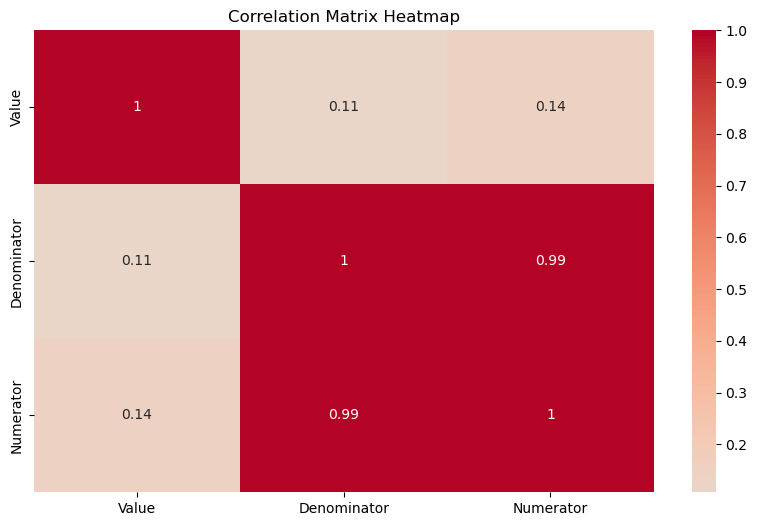

In [10]:
# Correlation Analysis
numeric_data = data_clean.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

Predictive Modeling - Data Preparation

In [11]:
# Step 4: Predictive Modeling
# Data Preparation
features = ['Ethnicity', 'Gender', 'FSM', 'SEN_type', 'SEN_grouping', 'Admission_type', 'School_characteristic', 'Religious_denomination']
X = data_clean[features]
y = data_clean['Value']

categorical_features = features  # All chosen features are categorical
one_hot_encoder = OneHotEncoder(drop='first')
transformer = ColumnTransformer(transformers=[
    ('cat', one_hot_encoder, categorical_features)],
    remainder='passthrough')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


 Model Training

In [12]:
# Model Training
pipeline = Pipeline([
    ('transformer', transformer),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Ethnicity', 'Gender', 'FSM',
                                                   'SEN_type', 'SEN_grouping',
                                                   'Admission_type',
                                                   'School_characteristic',
                                                   'Religious_denomination'])])),
                ('model', LinearRegression())])

Model Evaluation

In [13]:
# Model Evaluation
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 53.39867736102948
R-squared: 0.8914444461854069
